In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.integrate import odeint
from numba import jit

In [2]:
"""
# nominal CoSMO type
n_strains = 2
n_resources = 3

c = np.zeros((n_strains,n_resources))
c[0,0] = 2
c[1,0] = 2
c[0,1] = 2
c[1,2] = 2

l = np.zeros((n_strains,n_resources))
degree = 1
l[0,0] = 1*degree
l[1,0] = 1*degree

#nutrient "quality"
w = np.ones(n_resources)

#chemostat feeding
k = np.zeros(n_resources)
k[0] = 3

#chemostat dilution rate
r = np.ones(n_resources)*1
#r = np.array([1,0.2,0.2])

#death rate
m = np.ones(n_strains)*0.9

tau = 1

B = 1/tau*m


CF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)
CF_array[0,2,0] = 1
CF_array[1,1,0] = 1

#print(c)

#print(CF_array)

ratios = np.array([0.49,0.51])

D = np.array([0.01,0.01]) #diffusion constant for cells

H = np.array([100,1,1]) #diffusion constants for resources
"""

'\n# nominal CoSMO type\nn_strains = 2\nn_resources = 3\n\nc = np.zeros((n_strains,n_resources))\nc[0,0] = 2\nc[1,0] = 2\nc[0,1] = 2\nc[1,2] = 2\n\nl = np.zeros((n_strains,n_resources))\ndegree = 1\nl[0,0] = 1*degree\nl[1,0] = 1*degree\n\n#nutrient "quality"\nw = np.ones(n_resources)\n\n#chemostat feeding\nk = np.zeros(n_resources)\nk[0] = 3\n\n#chemostat dilution rate\nr = np.ones(n_resources)*1\n#r = np.array([1,0.2,0.2])\n\n#death rate\nm = np.ones(n_strains)*0.9\n\ntau = 1\n\nB = 1/tau*m\n\n\nCF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)\nCF_array[0,2,0] = 1\nCF_array[1,1,0] = 1\n\n#print(c)\n\n#print(CF_array)\n\nratios = np.array([0.49,0.51])\n\nD = np.array([0.01,0.01]) #diffusion constant for cells\n\nH = np.array([100,1,1]) #diffusion constants for resources\n'

In [3]:
"""
# circle, glucose competition
n_strains = 3
n_resources = 4

c = np.zeros((n_strains,n_resources))
c[0,0] = 2
c[1,0] = 2
c[2,0] = 2
c[0,3] = 2
c[1,1] = 2
c[2,2] = 2

l = np.zeros((n_strains,n_resources))
l[0,0] = 1
l[1,0] = 1
l[2,0] = 1

w = np.array([1,1,1,1])

k = np.array([1,0,0,0])

r = np.ones(n_resources)*0.3

m = np.ones(n_strains)*0.7

tau = 1

B = 1/tau*m


CF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)
CF_array[0,1,0] = 1
CF_array[1,2,0] = 1
CF_array[2,3,0] = 1


#print(c)
#print(CF_array)

ratios = np.array([0.3,0.5,0.2])

D = np.array([0.01,0.01,0.01])*0 #diffusion constant for cells

H = np.array([10,1,1,100]) #diffusion constants for resources
"""

'\n# circle, glucose competition\nn_strains = 3\nn_resources = 4\n\nc = np.zeros((n_strains,n_resources))\nc[0,0] = 2\nc[1,0] = 2\nc[2,0] = 2\nc[0,3] = 2\nc[1,1] = 2\nc[2,2] = 2\n\nl = np.zeros((n_strains,n_resources))\nl[0,0] = 1\nl[1,0] = 1\nl[2,0] = 1\n\nw = np.array([1,1,1,1])\n\nk = np.array([1,0,0,0])\n\nr = np.ones(n_resources)*0.3\n\nm = np.ones(n_strains)*0.7\n\ntau = 1\n\nB = 1/tau*m\n\n\nCF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)\nCF_array[0,1,0] = 1\nCF_array[1,2,0] = 1\nCF_array[2,3,0] = 1\n\n\n#print(c)\n#print(CF_array)\n\nratios = np.array([0.3,0.5,0.2])\n\nD = np.array([0.01,0.01,0.01])*0 #diffusion constant for cells\n\nH = np.array([10,1,1,100]) #diffusion constants for resources\n'

In [4]:
"""
# strict circle, one focal cell
n_strains = 3
n_resources = 4

c = np.zeros((n_strains,n_resources))
c[0,0] = 2
#c[1,0] = 2
#c[2,0] = 2
c[0,3] = 2
c[1,1] = 2
c[2,2] = 2

l = np.zeros((n_strains,n_resources))
l[0,0] = 1
l[1,1] = 0.5
l[2,2] = 0.5

w = np.array([1,1,1,1])

k = np.array([2,0,0,0])

r = np.ones(n_resources)*0.3

m = np.ones(n_strains)*0.3

tau = 1

B = 1/tau*m


CF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)
CF_array[0,1,0] = 1
CF_array[1,2,1] = 1
CF_array[2,3,2] = 1


#print(c)
#print(CF_array)

ratios = np.array([0.3,0.5,0.2])

D = np.array([0.01,0.01,0.01])*0 #diffusion constant for cells

H = np.array([100,1,1,10]) #diffusion constants for resources"
"""

'\n# strict circle, one focal cell\nn_strains = 3\nn_resources = 4\n\nc = np.zeros((n_strains,n_resources))\nc[0,0] = 2\n#c[1,0] = 2\n#c[2,0] = 2\nc[0,3] = 2\nc[1,1] = 2\nc[2,2] = 2\n\nl = np.zeros((n_strains,n_resources))\nl[0,0] = 1\nl[1,1] = 0.5\nl[2,2] = 0.5\n\nw = np.array([1,1,1,1])\n\nk = np.array([2,0,0,0])\n\nr = np.ones(n_resources)*0.3\n\nm = np.ones(n_strains)*0.3\n\ntau = 1\n\nB = 1/tau*m\n\n\nCF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)\nCF_array[0,1,0] = 1\nCF_array[1,2,1] = 1\nCF_array[2,3,2] = 1\n\n\n#print(c)\n#print(CF_array)\n\nratios = np.array([0.3,0.5,0.2])\n\nD = np.array([0.01,0.01,0.01])*0 #diffusion constant for cells\n\nH = np.array([100,1,1,10]) #diffusion constants for resources"\n'

In [5]:
"""
# nominal CoSMO hinge
n_strains = 3
n_resources = 5

c = np.zeros((n_strains,n_resources))
c[0,0] = 2
c[1,0] = 2
c[2,0] = 2
c[0,3] = 0.5
c[0,4] = 2
c[1,1] = 2
c[2,2] = 2

l = np.zeros((n_strains,n_resources))
l[0,0] = 1
l[1,0] = 1
l[2,0] = 1

w = np.array([1,1,1,1,1])

k = np.zeros(n_resources)
k[0] = 1

r = np.ones(n_resources)*0.3

m = np.ones(n_strains)*0.7

tau = 1

B = 1/tau*m


CF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)
CF_array[0,1,0] = 1
CF_array[0,2,0] = 1
CF_array[1,3,0] = 0
CF_array[2,4,0] = 1


print(c)
print(CF_array)

ratios = np.array([0.3,0.5,0.2])

D = np.array([0.0001,0.0001,0.0001]) #diffusion constant for cells

H = np.array([1000,100,1,1,1,1]) #diffusion constants for resources
"""

'\n# nominal CoSMO hinge\nn_strains = 3\nn_resources = 5\n\nc = np.zeros((n_strains,n_resources))\nc[0,0] = 2\nc[1,0] = 2\nc[2,0] = 2\nc[0,3] = 0.5\nc[0,4] = 2\nc[1,1] = 2\nc[2,2] = 2\n\nl = np.zeros((n_strains,n_resources))\nl[0,0] = 1\nl[1,0] = 1\nl[2,0] = 1\n\nw = np.array([1,1,1,1,1])\n\nk = np.zeros(n_resources)\nk[0] = 1\n\nr = np.ones(n_resources)*0.3\n\nm = np.ones(n_strains)*0.7\n\ntau = 1\n\nB = 1/tau*m\n\n\nCF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)\nCF_array[0,1,0] = 1\nCF_array[0,2,0] = 1\nCF_array[1,3,0] = 0\nCF_array[2,4,0] = 1\n\n\nprint(c)\nprint(CF_array)\n\nratios = np.array([0.3,0.5,0.2])\n\nD = np.array([0.0001,0.0001,0.0001]) #diffusion constant for cells\n\nH = np.array([1000,100,1,1,1,1]) #diffusion constants for resources\n'

In [6]:
"""
# 2 crossfeeding pairs
n_strains = 4
n_resources = 7

c = np.zeros((n_strains,n_resources))
c[0,0] = 2
c[1,0] = 2
c[2,0] = 2
c[3,0] = 2
c[0,2] = 2
c[0,6] = 1
c[1,1] = 2
c[2,3] = 2
c[3,4] = 2
c[3,5] = 1

l = np.zeros((n_strains,n_resources))
l[0,0] = 1
l[1,0] = 1
l[2,0] = 1
l[3,0] = 1

w = np.ones(n_resources)

k = np.zeros(n_resources)
k[0] = 5

r = np.ones(n_resources)*0.3

m = np.ones(n_strains)*0.7

tau = 1

B = 1/tau*m


CF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)
CF_array[0,1,0] = 0.8
CF_array[0,5,0] = 0.2
CF_array[1,2,0] = 1
CF_array[2,4,0] = 1
CF_array[3,3,0] = 0.8
CF_array[3,6,0] = 0.2


#print(c)
#print(CF_array)

ratios = np.array([0.25,0.25,0.25,0.25])

D = np.array([0.0001,0.0001,0.0001,0.0001]) #diffusion constant for cells

H = np.array([0,1,1,1,1,10,10]) #diffusion constants for resources
"""

'\n# 2 crossfeeding pairs\nn_strains = 4\nn_resources = 7\n\nc = np.zeros((n_strains,n_resources))\nc[0,0] = 2\nc[1,0] = 2\nc[2,0] = 2\nc[3,0] = 2\nc[0,2] = 2\nc[0,6] = 1\nc[1,1] = 2\nc[2,3] = 2\nc[3,4] = 2\nc[3,5] = 1\n\nl = np.zeros((n_strains,n_resources))\nl[0,0] = 1\nl[1,0] = 1\nl[2,0] = 1\nl[3,0] = 1\n\nw = np.ones(n_resources)\n\nk = np.zeros(n_resources)\nk[0] = 5\n\nr = np.ones(n_resources)*0.3\n\nm = np.ones(n_strains)*0.7\n\ntau = 1\n\nB = 1/tau*m\n\n\nCF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)\nCF_array[0,1,0] = 0.8\nCF_array[0,5,0] = 0.2\nCF_array[1,2,0] = 1\nCF_array[2,4,0] = 1\nCF_array[3,3,0] = 0.8\nCF_array[3,6,0] = 0.2\n\n\n#print(c)\n#print(CF_array)\n\nratios = np.array([0.25,0.25,0.25,0.25])\n\nD = np.array([0.0001,0.0001,0.0001,0.0001]) #diffusion constant for cells\n\nH = np.array([0,1,1,1,1,10,10]) #diffusion constants for resources\n'

In [7]:

# 2 crossfeeding pairs
n_strains = 4
n_resources = 7

c = np.zeros((n_strains,n_resources))
c[0,0] = 2
c[1,0] = 2
c[2,0] = 2
c[3,0] = 2
c[0,2] = 2
c[0,6] = 1
c[1,1] = 2
c[2,3] = 2
c[3,4] = 2
c[3,5] = 1

l = np.zeros((n_strains,n_resources))
l[0,0] = 1
l[1,0] = 1
l[2,0] = 1
l[3,0] = 1

w = np.ones(n_resources)

k = np.zeros(n_resources)
k[0] = 5

r = np.ones(n_resources)*0.3

m = np.ones(n_strains)*0.7

tau = 1

B = 1/tau*m


CF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)
CF_array[0,1,0] = 0.8
CF_array[0,5,0] = 0.2
CF_array[1,2,0] = 1
CF_array[2,4,0] = 1
CF_array[3,3,0] = 0.8
CF_array[3,6,0] = 0.2


#print(c)
#print(CF_array)

ratios = np.array([0.25,0.25,0.25,0.25])

D = np.array([0.0001,0.0001,0.0001,0.0001]) #diffusion constant for cells

H = np.array([100,1,1,1,1,10,10]) #diffusion constants for resources


In [8]:

"""
# len 3 linear chain
n_strains = 3
n_resources = 4

c = np.zeros((n_strains,n_resources))
c[0,0] = 2
c[1,1] = 2
c[2,2] = 2


l = np.zeros((n_strains,n_resources))
l[0,0] = 0.5
l[1,1] = 0.5
l[2,2] = 0.5



w = np.ones(n_resources)

k = np.ones(n_resources)
k[0] = 1

r = np.ones(n_resources)*0.3

m = np.ones(n_strains)*0.3

tau = 1

B = 1/tau*m

ratios = np.array([0.3,0.5,0.2])

CF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)
CF_array[0,1,0] = 1
CF_array[1,2,1] = 1
CF_array[2,3,2] = 1

#print(c)
#print(CF_array)

D = np.ones(n_strains)*0.001 #diffusion constant for cells
H = np.array([100,1,1,1]) #diffusion constants for resources"
"""

'\n# len 3 linear chain\nn_strains = 3\nn_resources = 4\n\nc = np.zeros((n_strains,n_resources))\nc[0,0] = 2\nc[1,1] = 2\nc[2,2] = 2\n\n\nl = np.zeros((n_strains,n_resources))\nl[0,0] = 0.5\nl[1,1] = 0.5\nl[2,2] = 0.5\n\n\n\nw = np.ones(n_resources)\n\nk = np.ones(n_resources)\nk[0] = 1\n\nr = np.ones(n_resources)*0.3\n\nm = np.ones(n_strains)*0.3\n\ntau = 1\n\nB = 1/tau*m\n\nratios = np.array([0.3,0.5,0.2])\n\nCF_array = np.zeros((n_strains,n_resources,n_resources)) # the MiCRM crossfeeding array (D_ab in their parlance)\nCF_array[0,1,0] = 1\nCF_array[1,2,1] = 1\nCF_array[2,3,2] = 1\n\n#print(c)\n#print(CF_array)\n\nD = np.ones(n_strains)*0.001 #diffusion constant for cells\nH = np.array([100,1,1,1]) #diffusion constants for resources"\n'

In [9]:
def get_steady_state(n_strains,n_resources,ratios,c,l,w,k,r,m,tau,H,CF_array,N_0,R_0,dt,t_final):
    
    steady_state = False
    
    attempts = 0
    
    while not steady_state:
        
        if attempts > 0:
            
            t_final = t_final*2
            print('No steady state found on attempt %s'%attempts, ' running for longer')
            
            
        epsilon = 1e-4
        t_min = 30
        
        
        nsteps = int(t_final/dt)

        time = np.zeros(nsteps+1)

        N = np.zeros((n_strains,nsteps+1))
        N[:,0] = N_0*ratios

        R = np.zeros((n_resources,nsteps+1)) + R_0
        #R[0,0] = R_0

        for tt in range(nsteps):


            #I am too lazy to figure out matricies, although I'm sure that's easy
            dN = np.zeros(n_strains)
            for ii in range(n_strains):
                dN[ii] = -1/tau*N[ii,tt]*m[ii]
                for aa in range(n_resources):
                    dN[ii] += 1/tau*N[ii,tt]*(1-l[ii,aa])*w[aa]*c[ii,aa]*R[aa,tt]

            dR = np.zeros(n_resources)
            for aa in range(n_resources):
                dR[aa] = k[aa] - r[aa]*R[aa,tt]

                for ii in range(n_strains):
                    dR[aa] += -N[ii,tt]*c[ii,aa]*R[aa,tt]

                    for bb in range(n_resources):
                        dR[aa] += N[ii,tt]*CF_array[ii,aa,bb]*l[ii,bb]*w[bb]/w[aa]*c[ii,bb]*R[bb,tt]


            N[:,tt+1] = N[:,tt] + dN*dt
            R[:,tt+1] = R[:,tt] + dR*dt
            time[tt+1] = time[tt]+dt


            if time[tt+1] > t_min and np.sum(np.abs(dN)) < epsilon and not steady_state:
                steady_state = True
                Nss = N[:,tt+1]
                Rss = R[:,tt+1]
                Tss = time[tt+1]
                #break
        
        attempts += 1
        
        if attempts > 5:
            break
    
    return N[:,:tt+1],R[:,:tt+1],time[:tt+1],Nss,Rss,Tss

In [10]:
#troubleshooting for the steady state function

N_0 = 1
R_0 = 0
dt = 0.001
t_final = 50

N,R,time,Nss,Rss,Tss = get_steady_state(n_strains,n_resources,ratios,c,l,w,k,r,m,tau,H,CF_array,N_0,R_0,dt,t_final)

print(Nss,Rss)

[1.75792352 1.40242556 1.40242556 1.75792352] [0.38635707 0.35       0.28399306 0.35       0.28399306 0.13201388
 0.13201388]


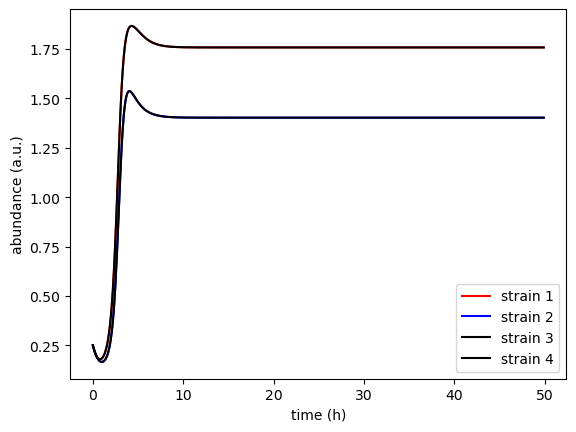

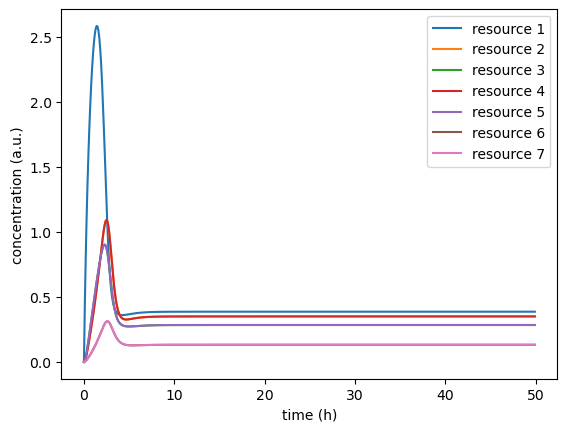

In [11]:
stride = 100
for nn in range(n_strains):
    if nn==0:
        col = 'r'
    elif nn==1:
        col = 'b'
    else:
        col = 'k'
    plt.plot(time[::stride],N[nn,::stride],label='strain %s'%int(nn+1),c = col)
    #plt.axhline(y=Nss[nn])
plt.legend()
#plt.axvline(x=Tss)
plt.xlabel('time (h)')
plt.ylabel('abundance (a.u.)')
plt.show()

for rr in range(n_resources):
    plt.plot(time[::stride],R[rr,::stride],label='resource %s'%int(rr+1))
plt.legend()
plt.xlabel('time (h)')
plt.ylabel('concentration (a.u.)')
plt.show()


In [12]:
def get_A_F(n_strains, n_resources, tau,l,w,c,CF_array):
    
    # make A
    A = np.zeros((n_resources,n_strains))
    for aa in range(n_resources):
        for ii in range(n_strains):
            A[aa,ii] = tau*(1-l[ii,aa])*w[aa]*c[ii,aa]
            
    #make F
    F = np.zeros((n_strains,n_resources,n_resources))
    for ii in range(n_strains):
        for aa in range(n_resources):
            for bb in range(n_resources):
                F[ii,aa,bb] = CF_array[ii,aa,bb]*l[ii,bb]*w[bb]/w[aa]*c[ii,bb]
                
    return A,F

In [13]:
def calc_T(n_strains,n_resources,Nss,Rss,A,B,D,q):
    
    T = np.zeros((n_strains,n_strains))
    
    for ii in range(n_strains):
        #this matrix is diagonal, so we only need to loop through once
        T[ii,ii] = -D[ii]*q**2 - B[ii]
        
        for bb in range(n_resources):
             T[ii,ii] += Rss[bb]*A[bb,ii]
    
    return T

def calc_U(n_strains,n_resources,Nss,A):
    
    U = np.zeros((n_strains,n_resources))
    for ii in range(n_strains):
        for aa in range(n_resources):
            U[ii,aa] = A[aa,ii]*Nss[ii]
            
    return U

def calc_W(n_strains,n_resources,Nss,F,H,r,c,q):
    
    W = np.zeros((n_resources,n_resources))
    for aa in range(n_resources):
        for bb in range(n_resources):
            if aa==bb:
                #print('H = ',np.size(H))
                #print('r = ',np.size(r))
                W[aa,bb] = -(q**2*H[aa] + r[aa])
            else:
                W[aa,bb]
        
            for jj in range(n_strains):

                W[aa,bb] += Nss[jj]*F[jj,aa,bb]
                
                if aa==bb:
                    
                    W[aa,bb] += -Nss[jj]*c[jj,aa]
    
    return W

def calc_V(n_strains,n_resources,Rss,F,c):
    
    V = np.zeros((n_resources,n_strains))
    for aa in range(n_resources):
        for ii in range(n_strains):
            V[aa,ii] = -c[ii,aa]*Rss[aa]
            
            for bb in range(n_resources):
                V[aa,ii] += F[ii,aa,bb]*Rss[bb]
    return V

def build_big_matrix(n_strains,n_resources,Nss,Rss,U,V,A,B,D,F,H,r,c,q):
    
    M = np.zeros((int(n_strains+n_resources),int(n_strains+n_resources)))
    
    T = calc_T(n_strains,n_resources,Nss,Rss,A,B,D,q)
    W = calc_W(n_strains,n_resources,Nss,F,H,r,c,q)
    
    M[0:n_strains,0:n_strains] = T
    M[0:n_strains,n_strains:] = U
    M[n_strains:,0:n_strains] = V
    M[n_strains:,n_strains:] = W
    
    return M

"""
#lets actually calculate some stuff!
#first, the steady state for our parameter set
N_0 = 0.02
R_0 = 1
dt = 0.01
t_final = 1000
Nss,Rss,Tss = get_steady_state(n_strains,n_resources,c,l,w,k,r,m,tau,D,H,CF_array,N_0,R_0,dt,t_final)
"""



'\n#lets actually calculate some stuff!\n#first, the steady state for our parameter set\nN_0 = 0.02\nR_0 = 1\ndt = 0.01\nt_final = 1000\nNss,Rss,Tss = get_steady_state(n_strains,n_resources,c,l,w,k,r,m,tau,D,H,CF_array,N_0,R_0,dt,t_final)\n'

In [14]:
# as U and V do not depend on q, we will pre-compute them for every steady state

A,F = get_A_F(n_strains, n_resources, tau,l,w,c,CF_array)

U = calc_U(n_strains,n_resources,Nss,A)
V = calc_V(n_strains,n_resources,Rss,F,c)

#now its time to calculate some lambdas as a function of q
npts = 10000
qs = np.linspace(0,100,npts)

#qs = 1/lengths

lambdas = np.zeros((int(n_strains+n_resources),npts))
max_vecs = []

for nn in range(npts):
    
    q = qs[nn]
    
    M = build_big_matrix(n_strains,n_resources,Nss,Rss,U,V,A,B,D,F,H,r,c,q)
    
    vals,vecs = la.eig(M)
    
    lambdas[:,nn] = vals

    """
    if nn == 1:
        print(vals)
        print(np.amax(vals))
        print(vecs[:,vals==np.amax(vals)])
    """
    
    max_vecs.append(vecs[:,vals==np.amax(vals)])



/tmp/ipykernel_424528/1828233799.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  lambdas[:,nn] = vals


unstable modes!
maximum eigenvalue = 0.022847069434281442
q at max =  1.3101310131013102
maximum eigenvector =  [[ 5.42523261e-01]
 [ 4.53356141e-01]
 [-4.53356141e-01]
 [-5.42523261e-01]
 [-1.01568680e-15]
 [ 3.72058080e-03]
 [ 7.59099542e-03]
 [-3.72058080e-03]
 [-7.59099542e-03]
 [ 8.07804829e-03]
 [-8.07804829e-03]]


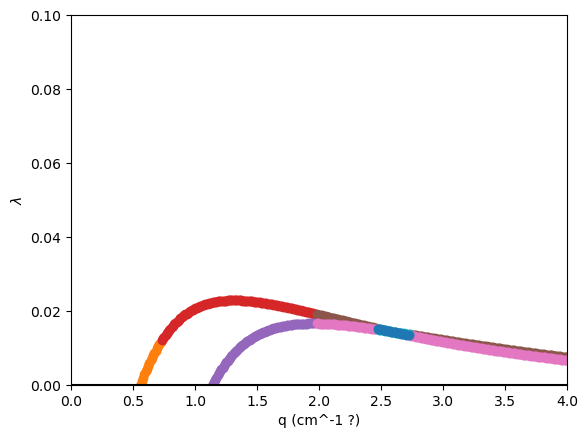

In [15]:
if (lambdas>0).any():
    print('unstable modes!')
    whr = np.where(lambdas>0)
    #print('unstable between %s and'%(1/qs[whr[1][-1]]),'%s'%(1/qs[whr[1][0]]))
    print('maximum eigenvalue = %s'%(np.amax(lambdas)))
    indx = np.where(lambdas == np.amax(lambdas))
    max_x = int(indx[1][0])
    print('q at max = ', qs[max_x])
    
    
    print('maximum eigenvector = ',max_vecs[max_x])
    
    
    av = np.mean(qs[whr[1][:]])
    sprd = np.amax(whr[1]) - np.amin(whr[1])
    
    
    add = 100
    rng = int(sprd+add)
    
    overshoot = np.amin(whr[1][0])-add/2
    
    if overshoot<0:
        strt = 0
        stp = int(np.amax(whr[1][:]) + add/2 - overshoot)
    
    else:
        
        strt = int(overshoot)
        stp = int(np.amax(whr[1][:]) + add/2)
    
    mx = np.amax(lambdas)+0.1
    mn = -0.5
    
    #strt = 0
    #stp = -1
    
    #plot the result!
    fig, ax = plt.subplots()
    #ax.set_xscale('log')
    #ax.set_xlim(0,10)
    for ii in range(int(n_strains+n_resources)):
        
        indx = int(strt+ii)
        
        ax.scatter(qs[strt:stp],lambdas[ii,strt:stp])
    plt.xlabel('q (cm^-1 ?)')
    plt.ylabel(r'$\lambda$')
    plt.ylim(0,0.1)
    #plt.gca().set_yscale('log')
    plt.axhline(y=0,c='k')
    plt.xlim(0,4)
    plt.show()

else:
    
    #plot the result!
    fig, ax = plt.subplots()
    #ax.set_xscale('log')
    #ax.set_xlim(0,10)
    for ii in range(int(n_strains+n_resources)):
        ax.scatter(qs,lambdas[ii,:])
    plt.xlabel('q (cm^-1)')
    plt.ylabel(r'$\lambda$')
    #plt.ylim(-1,1)
    #plt.xlim(-0.01,0.5)
    plt.show()
   

In [16]:
#PDE next!!!

In [20]:
#PDE properties
L = 10  # Spatial domain length
dx = 0.1
nx = int(L/dx)  # Number of spatial points
x = np.linspace(0, L, nx)  # Spatial grid

# Time settings
t_final = 1000
dt = 0.001
nt = int(t_final/dt)
t = np.linspace(0, t_final, nt)

In [21]:
#convert between ODE and PDE function variables
S = n_strains
M = n_resources
D_i_alpha_beta = CF_array
c_i_alpha = c
rho = r
D_N = D
D_R = H
kappa = k

In [22]:
#initial conditions
mag = 0.01

N_init = np.zeros((S, nx))  # Both species at uniform density Nss
R_init = np.zeros((M, nx))

for xx in range(nx):
    for ss in range(n_strains):
        N_init[ss,xx] = Nss[ss] + mag*np.random.normal()

    for rr in range(n_resources):
        R_init[rr,xx] = Rss[rr] + mag*np.random.normal()


In [23]:
# Combine initial conditions into a single vector
def flatten_state(N, R):
    return np.concatenate([N.flatten(), R.flatten()])


def unflatten_state(y):
    N = y[:(S * nx)].reshape(S, nx)
    R = y[(S * nx):].reshape(M, nx)
    return N, R


def unflatten_state_end(y, S, M, nx):
    """
    Unflatten the state vector into two separate lists N and R.

    Parameters:
    y (list): Flattened state vector.
    S (int): Number of rows for N.
    M (int): Number of rows for R.
    nx (int): Number of columns for both N and R.

    Returns:
    tuple: Two lists N and R.
    """
    N = []
    R = []
    
    for i in range(S):
        N.append(y[i * nx:(i + 1) * nx])
    
    for i in range(M):
        R.append(y[(S * nx) + i * nx:(S * nx) + (i + 1) * nx])
    
    return N, R

# Define the PDE system as a set of ODEs using finite differences for spatial derivatives
def pde_system(y, t):
    N, R = unflatten_state(y)
    
    # Initialize derivatives
    dNdt = np.zeros((S, nx))
    dRdt = np.zeros((M, nx))
    
    # Calculate spatial derivatives using finite differences with periodic boundary
    def laplacian(u):
        u_left = np.roll(u, 1)
        u_right = np.roll(u, -1)
        return (u_left - 2*u + u_right) / (dx**2)
    
    # Calculate diffusion terms
    for i in range(S):
        #print(np.shape(N[i, :]))
        dNdt[i] += D_N[i] * laplacian(N[i, :])
    
    for alpha in range(M):
        dRdt[alpha] += D_R[alpha] * laplacian(R[alpha, :])
    
    # Calculate reaction terms for species
    for i in range(S):
        growth_term = 0
        for alpha in range(M):
            growth_term += (1 - l[i, alpha]) * w[alpha] * c_i_alpha[i, alpha] * R[alpha]
        dNdt[i] += N[i] * (growth_term - m[i])
    
    # Calculate reaction terms for resources
    for alpha in range(M):
        # Resource production and decay
        dRdt[alpha] += kappa[alpha] - rho[alpha] * R[alpha]
        
        # Consumption by species
        for i in range(S):
            dRdt[alpha] -= N[i] * c_i_alpha[i, alpha] * R[alpha]
        
        # Conversion from other resources
        for i in range(S):
            for beta in range(M):
                if beta != alpha:
                    dRdt[alpha] += N[i] * D_i_alpha_beta[i, alpha, beta] * l[i, beta] * (w[beta] / w[alpha]) * c_i_alpha[i, beta] * R[beta]

    return flatten_state(dNdt, dRdt)


In [36]:
# Solve the PDE system
initial_state = flatten_state(N_init, R_init)
%time full_solution = odeint(pde_system, initial_state, t, full_output=True)

CPU times: user 3min 23s, sys: 21.2 s, total: 3min 44s
Wall time: 3min 46s


In [37]:
full_solution

(array([[1.73424510e+00, 1.75053174e+00, 1.75921413e+00, ...,
         1.30531518e-01, 1.27151331e-01, 1.36827213e-01],
        [1.73425572e+00, 1.75056619e+00, 1.75926551e+00, ...,
         1.34606984e-01, 1.32949516e-01, 1.33291856e-01],
        [1.73427036e+00, 1.75059733e+00, 1.75930735e+00, ...,
         1.34389917e-01, 1.33851796e-01, 1.33586106e-01],
        ...,
        [1.23554556e-10, 7.39328865e-12, 4.32384087e-13, ...,
         1.68126101e-01, 1.73814574e-01, 1.79555191e-01],
        [1.23554594e-10, 7.39329098e-12, 4.32384226e-13, ...,
         1.68126101e-01, 1.73814574e-01, 1.79555191e-01],
        [1.23554632e-10, 7.39329332e-12, 4.32384364e-13, ...,
         1.68126101e-01, 1.73814574e-01, 1.79555191e-01]],
       shape=(1000000, 1100)),
 {'hu': array([1.47207397e-05, 2.09540621e-05, 2.51070747e-05, ...,
         9.52845488e+00, 9.52845488e+00, 9.52845488e+00], shape=(999999,)),
  'tcur': array([1.01207091e-03, 2.01651084e-03, 3.00162201e-03, ...,
         1.00745125e+

In [25]:
# Extract solutions at different time points
N_solutions = []
R_solutions = []
tm = []

stride = 1000

for i in range(int(len(t)/stride)):

    time = t[i*stride]
    tm.append(time)

    N, R = unflatten_state_end(solution[i*stride],S,M,nx)
    N_solutions.append(N.copy())
    R_solutions.append(R.copy())

# Convert to numpy arrays for easier indexing
N_solutions = np.array(N_solutions)
R_solutions = np.array(R_solutions)

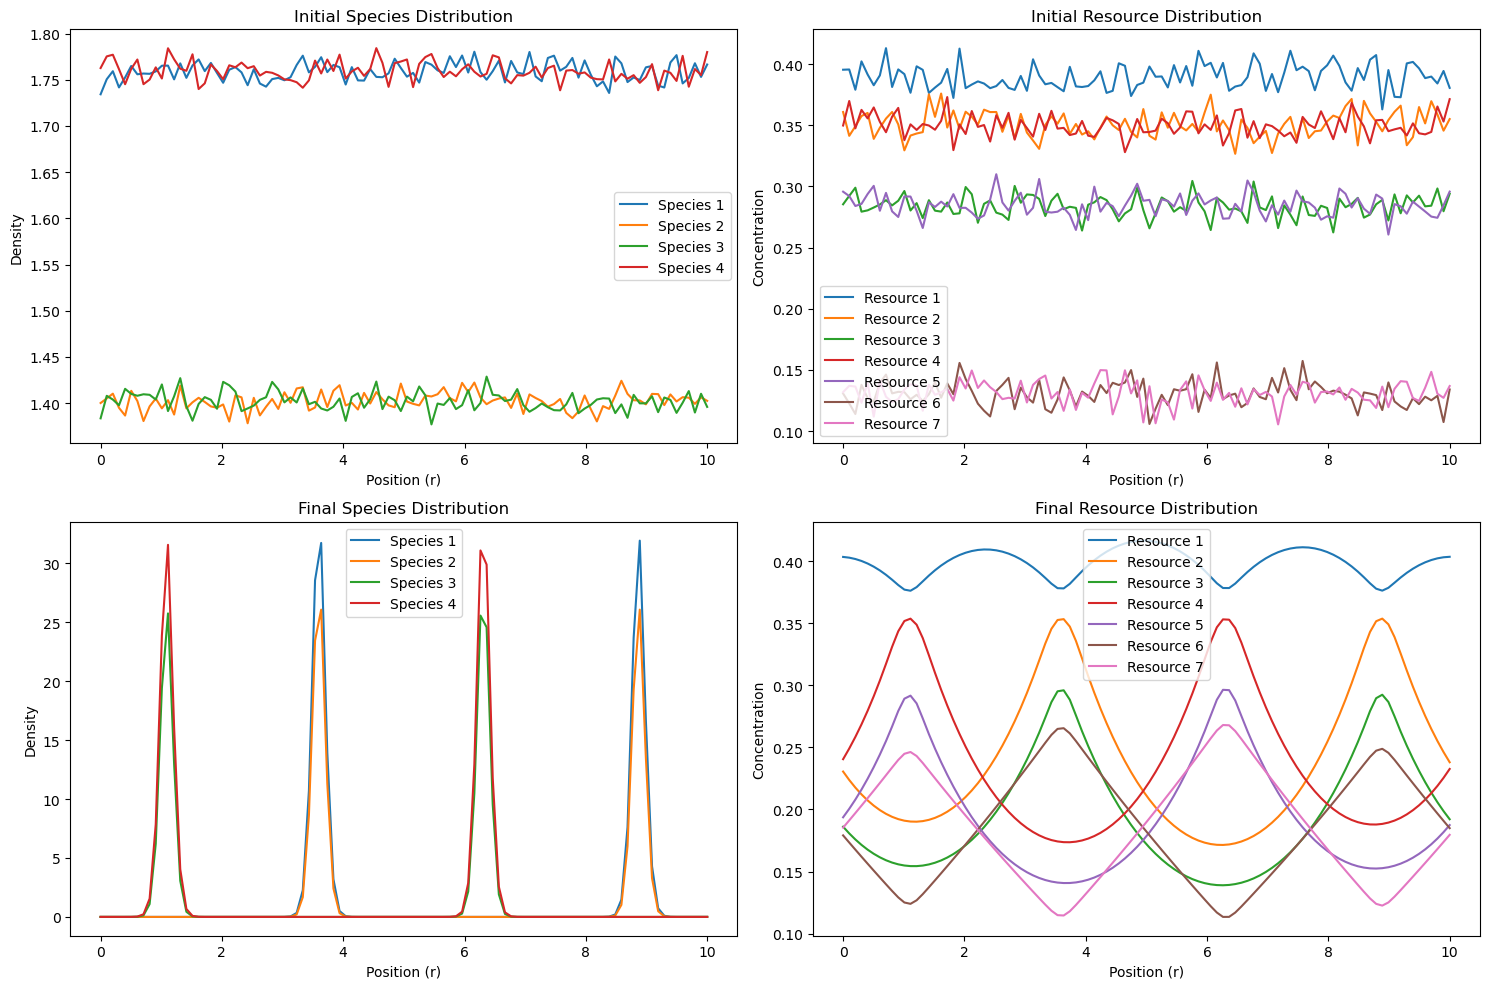

In [26]:
# Plot initial and final states
plt.figure(figsize=(15, 10))

# Plot initial state
plt.subplot(2, 2, 1)
for i in range(S):
    plt.plot(x, N_solutions[0, i], label=f'Species {i+1}')
plt.title('Initial Species Distribution')
plt.xlabel('Position (r)')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 2)
for alpha in range(M):
    plt.plot(x, R_solutions[0, alpha], label=f'Resource {alpha+1}')
plt.title('Initial Resource Distribution')
plt.xlabel('Position (r)')
plt.ylabel('Concentration')
plt.legend()

# Plot final state
plt.subplot(2, 2, 3)
for i in range(S):
    plt.plot(x, N_solutions[-1, i], label=f'Species {i+1}')
plt.title('Final Species Distribution')
plt.xlabel('Position (r)')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 4)
for alpha in range(M):
    plt.plot(x, R_solutions[-1, alpha], label=f'Resource {alpha+1}')
plt.title('Final Resource Distribution')
plt.xlabel('Position (r)')
plt.ylabel('Concentration')
plt.legend()

plt.tight_layout()
#plt.savefig('1D_pde_solution_190325.png')
plt.show()

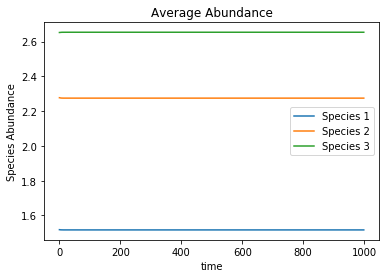

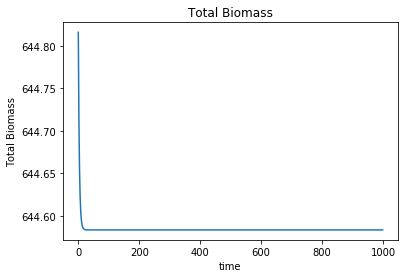

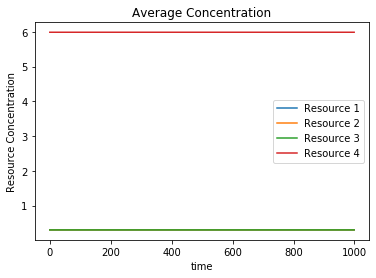

In [ ]:
colors = ['k','r']
#stride = 1000
for i in range(S):
    plt.plot(tm, np.mean(N_solutions[:, i],axis = -1), label=f'Species {i+1}')
plt.title('Average Abundance')
plt.xlabel('time')
plt.ylabel('Species Abundance')
plt.legend()
plt.show()

#total biomass
plt.plot(tm, np.sum(N_solutions, axis=(1, 2)))
plt.title('Total Biomass')
plt.xlabel('time')
plt.ylabel('Total Biomass')
plt.show()

stride = 1000
for i in range(M):
    plt.plot(tm, np.mean(R_solutions[:, i],axis = -1), label=f'Resource {i+1}')
plt.title('Average Concentration')
plt.xlabel('time')
plt.ylabel('Resource Concentration')
plt.legend()
plt.show()